## Exercise 1.1

In this exercise we will use the Amazon sentiment analysis data (Blitzer et al., 2007), where the goal is to classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews. To load the data, type:

In [26]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('../lxmls-tookit/lxmls')
import lxmls

In [1]:
import lxmls.readers.sentiment_reader as srs
scr = srs.SentimentCorpus("books")

This will load the data in a bag-of-words representation where rare words (occurring less than 5 times in the training data) are removed.

1. Implement the Naive Bayes algorithm. Open the file `multinomial_naive_bayes.py`,  which is inside the classifiers folder. In the MultinomialNaiveBayes class you will find the train method. We have already placed some code in that file to help you get started.
    
2. After implementing, run Naive Bayes with the multinomial model on the Amazon dataset (sentiment classification) and report results both for training and testing

In [10]:
# testing
import numpy as np
scr.train_y == np.unique(scr.train_y)[0]

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [19]:
import lxmls.classifiers.multinomial_naive_bayes as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print("Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

c:\users\hugos\onedrive\nova ims doctoral program\lxmls 2022\lxmls-toolkit\lxmls\classifiers\multinomial_naive_bayes.py:62: RuntimeWarning: divide by zero encountered in log
  params[1:, i] = np.nan_to_num(np.log(likelihood[:, i]))


Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.987500 test: 0.635000


Observe that words that were not observed at training time cause problems at testtime. Why? To  solve this problem, apply a simple add-one smoothing technique:  replace the expression in Eq. 1.9 for the estimation of the conditional probabilities by
    
${\hat P}(w_j|c_k) = \frac{1+\sum_ {m \in \mathcal{I}_k} n_j(x^m)}{J + \sum_{i=1}^J \sum_ {m\in \mathcal{I}_k} n_i(x^m)}.$

where $J$ is the number of distinct words. This is a widely used smoothing strategy which has a Bayesian interpretation: it corresponds to choosing a uniform prior for the word distribution on both classes, and to replace the maximum likelihood criterion by a maximum a posteriori approach. This is a form of regularization, preventing the model from overfitting on the training data. See e.g. Manning and Schütze (1999); Manning et al. (2008) for more information. Report the new accuracies.

In [20]:
import lxmls.classifiers.multinomial_naive_bayes_add_one as mnbb
mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y)
y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)
y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print("Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.974375 test: 0.840000


## Exercise 1.2

We provide an implementation of the perceptron algorithm in the class Perceptron
(file `perceptron.py`).

Run the following commands to generate a simple dataset

In [22]:
%matplotlib inline
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(
    nr_examples=100,
    g1=[[-1,-1],1], 
    g2=[[1,1],1], 
    balance=0.5,
    split=[0.5,0,0.5]
)

Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

In [34]:
import lxmls.classifiers.perceptron as percc
perc = percc.Perceptron()
params_perc_sd = perc.train(sd.train_X,sd.train_y)
y_pred_train = perc.test(sd.train_X,params_perc_sd)
acc_train = perc.evaluate(sd.train_y, y_pred_train)
y_pred_test = perc.test(sd.test_X,params_perc_sd)
acc_test = perc.evaluate(sd.test_y, y_pred_test)
print("Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

Rounds: 0 Accuracy: 0.900000
Rounds: 1 Accuracy: 1.000000
Rounds: 2 Accuracy: 1.000000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Perceptron Simple Dataset Accuracy train: 0.960000 test: 0.960000


[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


c:\users\hugos\onedrive\nova ims doctoral program\lxmls 2022\lxmls-toolkit\lxmls\readers\simple_data_set.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  axis.plot(x, y_star, 'g--', c=colour, label=name, linewidth=2)


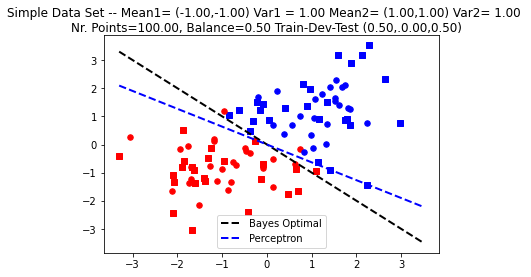

In [24]:
fig, axis = sd.plot_data("osx")
fig, axis = sd.add_line(fig, axis, params_perc_sd, "Perceptron", "blue")

Change the code to save the intermediate weight vectors, and plot them every five iterations. What do you observe?

## Exercise 1.3
We provide an implementation of the perc algorithm. Compare it with the perceptron for various values of $\lambda$

In [30]:
import lxmls.classifiers.mira as mirac
mira = mirac.Mira()
mira.regularizer = 1.0 # This is lambda
params_mira_sd = mira.train(sd.train_X,sd.train_y)
y_pred_train = mira.test(sd.train_X,params_mira_sd)
acc_train = mira.evaluate(sd.train_y, y_pred_train)
y_pred_test = mira.test(sd.test_X,params_mira_sd)
acc_test = mira.evaluate(sd.test_y, y_pred_test)
print("Mira Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

c:\Users\hugos\.conda\envs\lxmls-labs-env\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Rounds: 0 Accuracy: 0.980000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.940000
Rounds: 3 Accuracy: 0.980000
Rounds: 4 Accuracy: 0.980000
Rounds: 5 Accuracy: 0.940000
Rounds: 6 Accuracy: 0.920000
Rounds: 7 Accuracy: 0.940000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 1.000000 test: 0.960000


Compare the results achieved and separating hyperplanes found.

c:\users\hugos\onedrive\nova ims doctoral program\lxmls 2022\lxmls-toolkit\lxmls\readers\simple_data_set.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  axis.plot(x, y_star, 'g--', c=colour, label=name, linewidth=2)


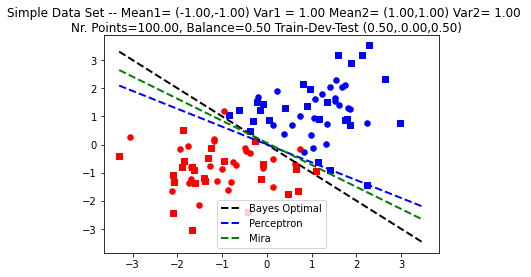

In [31]:
fig, axis = sd.add_line(fig, axis, params_mira_sd, "Mira","green")
fig

In [32]:
params_mira_sc = mira.train(scr.train_X,scr.train_y)
y_pred_train = mira.test(scr.train_X,params_mira_sc)
acc_train = mira.evaluate(scr.train_y, y_pred_train)
y_pred_test = mira.test(scr.test_X,params_mira_sc)
acc_test = mira.evaluate(scr.test_y, y_pred_test)
print("Mira Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

Rounds: 0 Accuracy: 0.817500
Rounds: 1 Accuracy: 0.900625
Rounds: 2 Accuracy: 0.948750
Rounds: 3 Accuracy: 0.970625
Rounds: 4 Accuracy: 0.987500
Rounds: 5 Accuracy: 0.987500
Rounds: 6 Accuracy: 0.996875
Rounds: 7 Accuracy: 0.998125
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Amazon Sentiment Accuracy train: 0.990625 test: 0.785000


In [35]:
params_perc_sc = perc.train(scr.train_X,scr.train_y)
y_pred_train = perc.test(scr.train_X,params_perc_sc)
acc_train = perc.evaluate(scr.train_y, y_pred_train)
y_pred_test = perc.test(scr.test_X,params_perc_sc)
acc_test = perc.evaluate(scr.test_y, y_pred_test)
print("Perceptron Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

Rounds: 0 Accuracy: 0.870000
Rounds: 1 Accuracy: 0.940000
Rounds: 2 Accuracy: 0.979375
Rounds: 3 Accuracy: 0.965625
Rounds: 4 Accuracy: 0.989375
Rounds: 5 Accuracy: 0.996250
Rounds: 6 Accuracy: 0.995000
Rounds: 7 Accuracy: 0.999375
Rounds: 8 Accuracy: 0.996250
Rounds: 9 Accuracy: 0.998125
Perceptron Amazon Sentiment Accuracy train: 0.998750 test: 0.825000


## Exercise 1.4
We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class MaxEnt batch, as well as an implementation of the SGD algorithm in the class `MaxEnt online`.

In [ ]:
import lxmls.classifiers.max_ent_batch as mebc
me_lbfgs = mebc.MaxEntBatch()
me_lbfgs.regularizer = 1.0
params_meb_sd = me_lbfgs.train(sd.train_X,sd.train_y)
y_pred_train = me_lbfgs.test(sd.train_X,params_meb_sd)
acc_train = me_lbfgs.evaluate(sd.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(sd.test_X,params_meb_sd)
acc_test = me_lbfgs.evaluate(sd.test_y, y_pred_test)
print(
    "Max-Ent batch Simple Dataset Accuracy train: %f test: %f" % 
    (acc_train,acc_test)
)
fig, axis = sd.add_line(fig, axis, params_meb_sd, "Max-Ent-Batch","orange")
fig

Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of $\lambda$) and report training and test set accuracy. What do you observe?

In [ ]:
params_meb_sc = me_lbfgs.train(scr.train_X,scr.train_y)
y_pred_train = me_lbfgs.test(scr.train_X,params_meb_sc)
acc_train = me_lbfgs.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_lbfgs.test(scr.test_X,params_meb_sc)
acc_test = me_lbfgs.evaluate(scr.test_y, y_pred_test)
print(
    "Max-Ent Batch Amazon Sentiment Accuracy train: %f test: %f" % 
    (acc_train, acc_test)
)

Now, fix $\lambda$ = 1.0 and train with SGD (you might try to adjust the initial step). Compare the objective values obtained during training with those obtained with L-BFGS. What do you observe?

In [ ]:
import lxmls.classifiers.max_ent_online as meoc
me_sgd = meoc.MaxEntOnline()
me_sgd.regularizer = 1.0
params_meo_sc = me_sgd.train(scr.train_X,scr.train_y)
y_pred_train = me_sgd.test(scr.train_X,params_meo_sc)
acc_train = me_sgd.evaluate(scr.train_y, y_pred_train)
y_pred_test = me_sgd.test(scr.test_X,params_meo_sc)
acc_test = me_sgd.evaluate(scr.test_y, y_pred_test)
print(
    "Max-Ent Online Amazon Sentiment Accuracy train: %f test: %f" % 
    (acc_train, acc_test)
)

## Exercise 1.5
Run the SVM primal algorithm. Then, repeat the MaxEnt exercise now using SVMs, for several values of $\lambda$:

In [ ]:
import lxmls.classifiers.svm as svmc
svm = svmc.SVM()
svm.regularizer = 1.0 # This is lambda
params_svm_sd = svm.train(sd.train_X,sd.train_y)
y_pred_train = svm.test(sd.train_X,params_svm_sd)
acc_train = svm.evaluate(sd.train_y, y_pred_train)
y_pred_test = svm.test(sd.test_X,params_svm_sd)
acc_test = svm.evaluate(sd.test_y, y_pred_test)
print("SVM Online Simple Dataset Accuracy train: {} test: {}".format(acc_train,acc_test))

In [ ]:
fig,axis = sd.add_line(fig,axis,params_svm_sd,"SVM","orange")
params_svm_sc = svm.train(scr.train_X,scr.train_y)
y_pred_train = svm.test(scr.train_X,params_svm_sc)
acc_train = svm.evaluate(scr.train_y, y_pred_train)
y_pred_test = svm.test(scr.test_X,params_svm_sc)
acc_test = svm.evaluate(scr.test_y, y_pred_test)
print("SVM Online Amazon Sentiment Accuracy train: {} test: {}".format(acc_train,acc_test))

Compare the results achieved and separating hyperplanes found.

In [ ]:
fig, axis = sd.add_line(fig, axis, params_svm_sd, "SVM", "yellow")
fig